# Modelos de regressão linear

## Objetivo: Demonstrar modelos de regressão linear possíveis de serem plotados com o seaborn.

In [1]:
import pandas as pd

df = pd.read_csv('materiais de aula/survey_results_public.csv', index_col='ResponseId')
df

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,5,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,5,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,33,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_context('notebook')

### Regressão Linear

A ideia de correlação que vimos anteriormente deriva da regressão linear.

De forma simplificada, a regressão linear procura a reta que minimiza a distância de todos os pontos dos dados.

Não entraremos em detalhes sobre a derivação matemática - basta saber que a regressão linear é uma tentativa de generalizar os dados observados, criando uma regra do tipo "a cada X incrementos na variável 1, a variável 2 cresce/diminui por Y unidades".

Nesse sentido, o coeficiente de correlação nos ajuda a entender o quão fidedigna é esta regra:
- coeficiente de correlação 1 (ou -1): regra encontrada na regressão é perfeitamente aplicável
- coeficiente de correlação 0: regra encontrada na regressão é descartável

### Cálculo da regressão linear

A regressão linear tem formato matemático de uma reta, isto é, é definida por uma expressão como:

`y = a*x + b`

Ou seja, para calcularmos a regressão linear, basta encontrar os coeficientes de inclinação `a` e intercepto `b`. Novamente, usamos o `scipy.stats` para isso.

Vamos usar os dados da África do Sul, que possuíam uma correlação leve, para realizar uma regressão linear:

In [29]:
import numpy as np
from scipy.stats import linregress


df_south_africa = df.loc[df['Country'] == 'South Africa'][['WorkExp', 'ConvertedCompYearly']].dropna().copy()
x = df_south_africa['WorkExp']
y = df_south_africa['ConvertedCompYearly']

regression = linregress(x, y)
regression

LinregressResult(slope=2229.7696322694933, intercept=29925.649379004193, rvalue=0.3457359070281232, pvalue=2.5767464575257593e-07, stderr=418.5996205742681, intercept_stderr=6680.7717818437395)

Veja que a saída é um objeto que guarda o valor da inclinação e intercepto. Além disso, o próprio valor da correlação (de Pearson) é calculado também.

In [30]:
print(f'Reta de regressão linear: y = {regression.slope:.2f}x + {regression.intercept:.2f}')
print(f'Coeficiente de correlação (Pearson): {regression.rvalue}')

Reta de regressão linear: y = 2229.77x + 29925.65
Coeficiente de correlação (Pearson): 0.3457359070281232


### Representação gráfica da regressão linear

Como comentado anteriormente, a regressão linear representa a reta que melhor se aproxima dos dados. Neste caso:

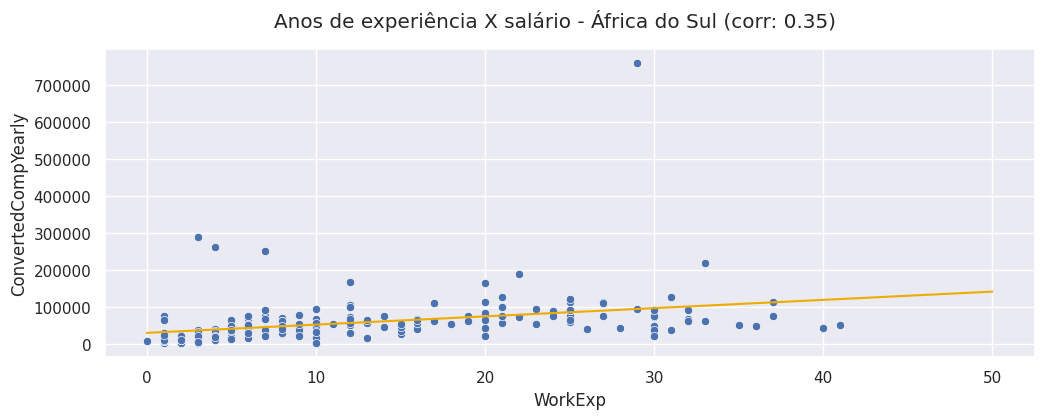

In [32]:
x_reg = np.linspace(0, 50, 100)
y_reg = x_reg * regression.slope + regression.intercept

fig, ax = plt.subplots(figsize=(12, 4))

sns.scatterplot(data=df_south_africa, ax=ax, x='WorkExp', y='ConvertedCompYearly')
sns.lineplot(ax=ax, x=x_reg, y=y_reg, color='#efab02')

fig.suptitle(f'Anos de experiência X salário - África do Sul (corr: {regression.rvalue:.2f})')
plt.show()

Note como os outliers são os únicos pontos distantes da reta de regressão. Vamos filtrá-los e recalcular a reta de regressão, para ver como fica a correlação:

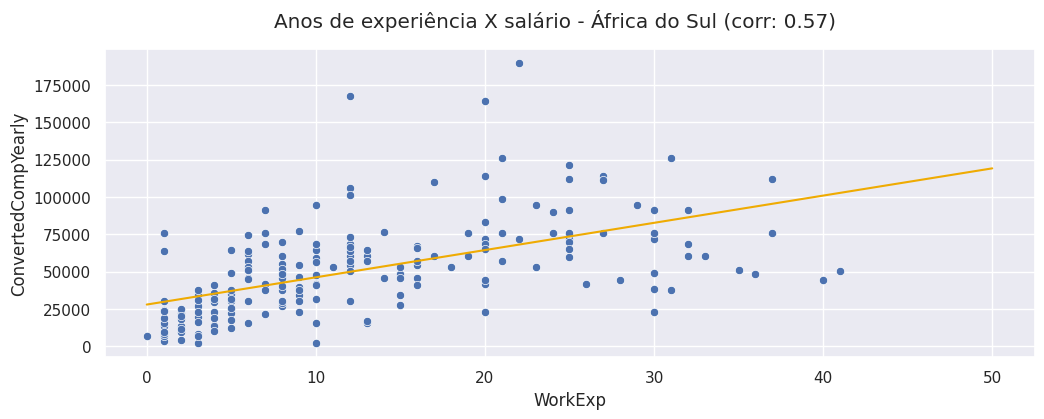

In [35]:
# Filtro
df_south_africa_filtered = df_south_africa.loc[df_south_africa['ConvertedCompYearly'] < 200_000]

# Cálculo da regressão linear
x = df_south_africa_filtered['WorkExp']
y = df_south_africa_filtered['ConvertedCompYearly']
regression = linregress(x, y)

# Valores da reta de regressão
x_reg = np.linspace(0, 50, 100)
y_reg = x_reg * regression.slope + regression.intercept

# Gráfico
fig, ax = plt.subplots(figsize=(12, 4))

sns.scatterplot(data=df_south_africa_filtered, ax=ax, x='WorkExp', y='ConvertedCompYearly')
sns.lineplot(ax=ax, x=x_reg, y=y_reg, color='#efab02')

fig.suptitle(f'Anos de experiência X salário - África do Sul (corr: {regression.rvalue:.2f})')
plt.show()

Os outliers estavam realmente influenciando na nossa reta de regressão. A discussão sobre quando remover outliers vai além desse curso, mas é importante entender o impacto que possuem em métodos como regressão linear.

### Regressão linear pelo Seaborn

O próprio `seaborn` é capaz de estimar a regressão linear de um conjunto de dados. Para isso, usamos a função de plotagem especial `sns.regplot`:

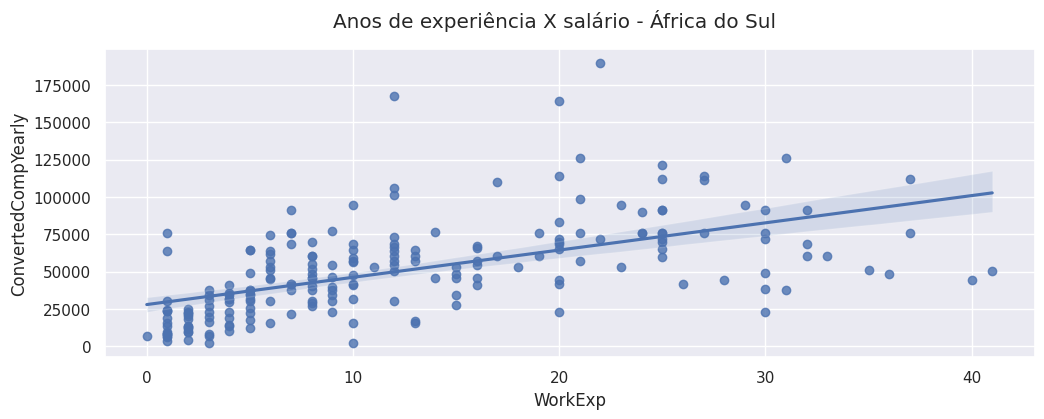

In [40]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.regplot(data=df_south_africa_filtered, ax=ax, x='WorkExp', y='ConvertedCompYearly')

fig.suptitle(f'Anos de experiência X salário - África do Sul')
plt.show()

Esse método nos permite visualizar uma regressão linear com poucas linhas de código. Ele até mesmo dá uma ideia da incerteza da reta, ao gerar uma região sombreada que corresponde ao intervalo de confiança!

A desvantagem é que não é possível ver diretamente os valores de inclinação, intercepto, e coeficiente de correlação. Então se esses valores forem importantes para sua análise, é preciso calculá-los pelo `scipy`.

É possível usar o argumento `order` para valor 2 ou maior para gerar uma regressão de ordem superior (polinômios):

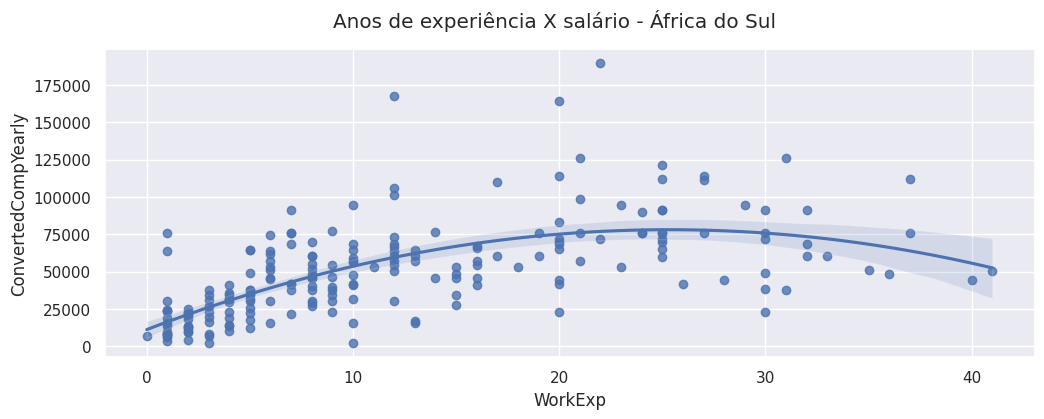

In [45]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.regplot(data=df_south_africa_filtered, ax=ax, x='WorkExp', y='ConvertedCompYearly', order=2)

fig.suptitle(f'Anos de experiência X salário - África do Sul')
plt.show()

Outros argumentos possíveis são `logx` para usar o logaritmo do eixo X como base para regressão:

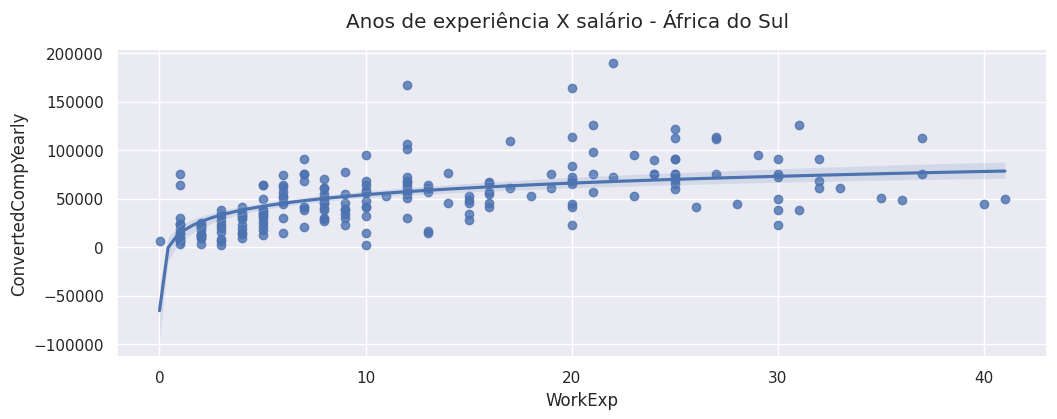

In [47]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.regplot(data=df_south_africa_filtered+0.01, ax=ax, x='WorkExp', y='ConvertedCompYearly', logx=True)

fig.suptitle(f'Anos de experiência X salário - África do Sul')
plt.show()

Ou `logistic` para usar regressão logística (não abordaremos neste curso, e requer pacote `statsmodels`):

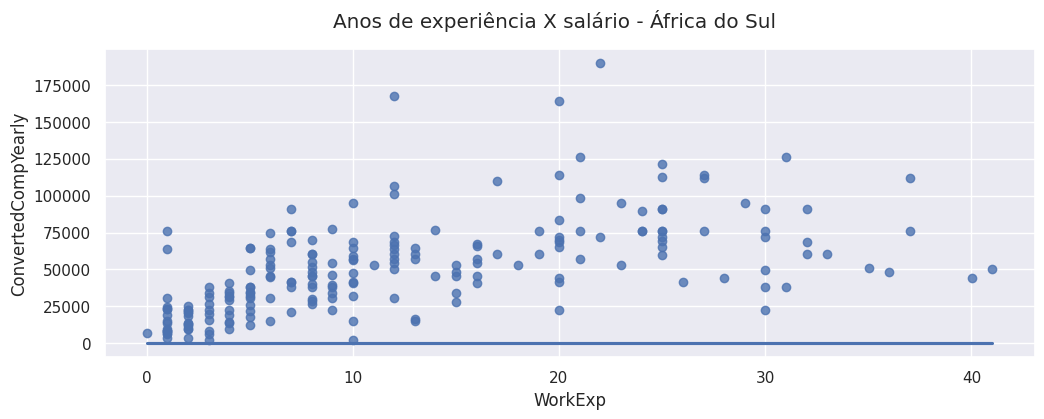

In [49]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.regplot(data=df_south_africa_filtered+0.01, ax=ax, x='WorkExp', y='ConvertedCompYearly', logistic=True)

fig.suptitle(f'Anos de experiência X salário - África do Sul')
plt.show()